In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [2]:
# Importing atmospheric conv neutrino data from Honda et al. 2007
# contains both nu_mu and nu_e, with their bars 

data = pd.read_fwf('spl-nu-01-01-000.d', sep = ' '  ,skiprows = 1)
data

# Importing the plots from Ranjan's paper fig 1
# data obtained from webplotdigitizer

r_conv_mu = pd.read_csv("Data/Ranjan et al fig 1 atm conv mu.csv", header=None)
r_conv_e = pd.read_csv("Data/Ranjan et al fig 1 atm conv e.csv", header=None)

In [3]:
# processing the data

E_conv = np.array(data['Enu(GeV)'])  # Conventional neutrino energy in GeV

nu_mu = np.array(data['NuMu']) * 1e-4  # cross section in (cm^2 sec sr GeV)^-1
nu_mu_bar = np.array(data['NuMubar']) * 1e-4 

nu_e = np.array(data['NuE']) * 1e-4   # cross section in (cm^2 sec sr GeV)^-1
nu_e_bar = np.array(data['NuEbar  (m^2']) * 1e-4 

nu_mu_conv = nu_mu + nu_mu_bar
nu_e_conv = nu_e + nu_e_bar

nu_mu_plot = nu_mu_conv * (E_conv**2)
nu_e_plot = nu_e_conv * (E_conv**2)

In [4]:
# Extrapolating the data for higher energies 
# based on finding the last slope in log-log space 
# and extending that linearly

last_slope = (np.log10(nu_mu_plot[-1]) - np.log10(nu_mu_plot[-2])) / (np.log10(E_conv[-1]) - np.log10(E_conv[-2]))

const_mu = np.log10(nu_mu_plot[-1]) - last_slope * np.log10(E_conv[-1])
const_e = np.log10(nu_e_plot[-1]) - last_slope * np.log10(E_conv[-1])

E_conv_ext = np.logspace(np.log10(E_conv[-1]), 7, num=1000)
nu_mu_ext = 10**(last_slope * np.log10(E_conv_ext) + const_mu)
nu_e_ext = 10**(last_slope * np.log10(E_conv_ext) + const_e)

In [5]:
# Extrapolating data using scipy interp1d function
extrapolate_mu = scipy.interpolate.interp1d(np.log10(E_conv), np.log10(nu_mu_plot), kind='linear', fill_value='extrapolate')
extrapolate_e = scipy.interpolate.interp1d(np.log10(E_conv), np.log10(nu_e_plot), kind='linear', fill_value='extrapolate')

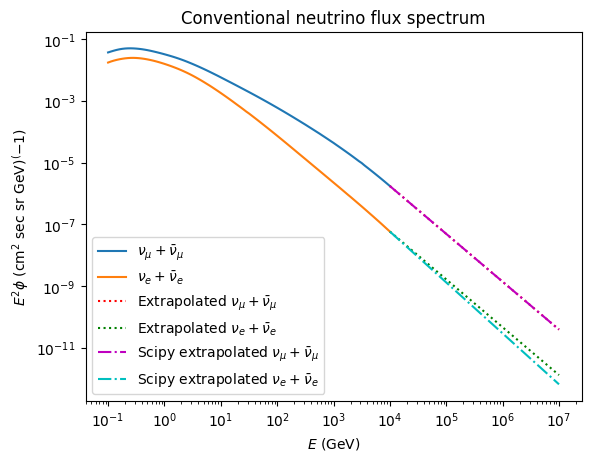

In [6]:
# Plotting E^2 phi vs E 

plt.loglog(E_conv, nu_mu_plot, label = r"$\nu_\mu + \bar{\nu}_\mu$")
plt.loglog(E_conv, nu_e_plot, label = r"$\nu_e + \bar{\nu}_e$")
plt.xlabel(r"$E$ (GeV)")
plt.ylabel(r"$E^2 \phi$ (cm$^2$ sec sr GeV)$^(-1)$")
plt.title("Conventional neutrino flux spectrum")
# plt.xlim(left = 1e3)
# plt.ylim(top = 1e-4)
plt.yticks(np.arange(1e-9, 1e-1, 1e5), labels=[])

# plt.loglog(r_conv_mu[0], r_conv_mu[1], 'b--', label = r"$\nu_\mu + \bar{\nu}_\mu$ from fig 1")
# plt.loglog(r_conv_e[0], r_conv_e[1], 'y--', label = r"$\nu_e + \bar{\nu}_e$ from fig 1")

plt.loglog(E_conv_ext, nu_mu_ext, 'r:', label = r"Extrapolated $\nu_\mu + \bar{\nu}_\mu$")
plt.loglog(E_conv_ext, nu_e_ext, 'g:', label = r"Extrapolated $\nu_e + \bar{\nu}_e$")

plt.loglog(E_conv_ext, 10**(extrapolate_mu(np.log10(E_conv_ext))), 'm-.', label = r"Scipy extrapolated $\nu_\mu + \bar{\nu}_\mu$")
plt.loglog(E_conv_ext, 10**(extrapolate_e(np.log10(E_conv_ext))), 'c-.', label = r"Scipy extrapolated $\nu_e + \bar{\nu}_e$")

plt.legend()

In [7]:
# Importing the nu_mu(-) prompt neutrino flux data set 
# from: https://arxiv.org/pdf/0806.0418

prompt = pd.read_csv("Data/0806.0418 fig 10 - prompt nu_mu.csv", header=None)

E_prompt = 10**(np.array(prompt[0]))  # prompt neutrino energy in GeV 
E3phi = np.array(prompt[1])  # E^3 phi in GeV^2 (cm^2 sec sr)^-1

E2phi = E3phi/(E_prompt)   # E^2 phi in G


# Importing data from Ranjan et al fig 1 for prompt nu_mu

r_prompt = pd.read_csv("Data/Ranjan et al fig 1 prompt nu mu.csv", header=None)

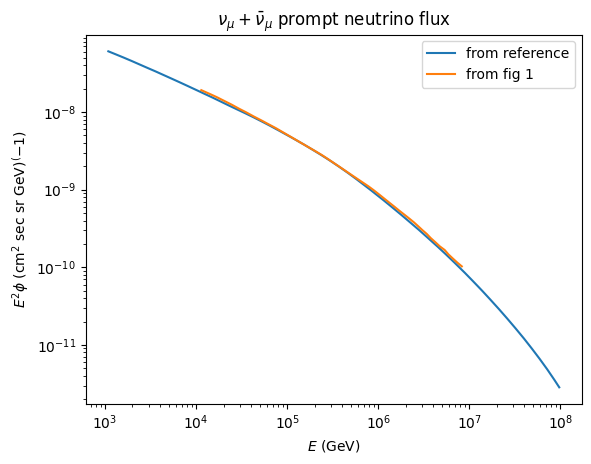

In [8]:
plt.loglog(E_prompt, E2phi, label="from reference")
# plt.loglog(E_prompt, np.gradient(E3phi, E_prompt), '--')
plt.loglog(r_prompt[0], r_prompt[1], label="from fig 1")
plt.xlabel(r"$E$ (GeV)")
plt.ylabel(r"$E^2 \phi$ (cm$^2$ sec sr GeV)$^(-1)$")
plt.title(r"$\nu_\mu + \bar{\nu}_\mu$ prompt neutrino flux")
plt.legend()

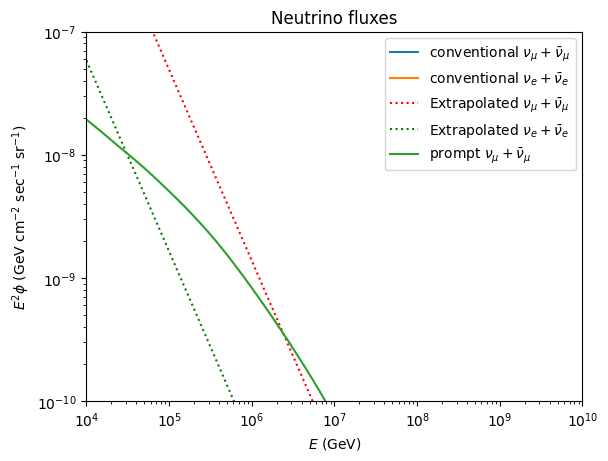

In [9]:
# Recreating figure 1 from Ranjan et al. 

# conventional neutrinos
plt.loglog(E_conv, nu_mu_plot, label = r"conventional $\nu_\mu + \bar{\nu}_\mu$")
plt.loglog(E_conv, nu_e_plot, label = r"conventional $\nu_e + \bar{\nu}_e$")
plt.xlabel(r"$E$ (GeV)")
plt.ylabel(r"$E^2 \phi$ (cm$^2$ sec sr GeV)$^(-1)$")
plt.yticks(np.arange(1e-9, 1e-1, 1e5), labels=[])

# extrapolated lines
plt.loglog(E_conv_ext, nu_mu_ext, 'r:', label = r"Extrapolated $\nu_\mu + \bar{\nu}_\mu$")
plt.loglog(E_conv_ext, nu_e_ext, 'g:', label = r"Extrapolated $\nu_e + \bar{\nu}_e$")

# prompt neutrinos
plt.loglog(E_prompt, E2phi, label=r"prompt $\nu_\mu + \bar{\nu}_\mu$")
plt.xlabel(r"$E$ (GeV)")
plt.ylabel(r"$E^2 \phi$ (GeV cm$^{-2}$ sec$^{-1}$ sr$^{-1}$)")
plt.title("Neutrino fluxes")

plt.xlim(1e4, 1e10)
plt.ylim(1e-10, 1e-7)
plt.show
plt.legend()

In [19]:
# Importing atmospherical conventional neutrino data from https://arxiv.org/pdf/1212.4760

nu_e_conv_1212 = pd.read_csv("Data/1212.4760 fig 4 conv nu_e.csv", header=None)
nu_mu_conv_1212 = pd.read_csv("Data/1212.4760 fig 4 conv nu_mu.csv", header=None)

logE_conv_e_1212 = np.array(nu_e_conv_1212[0])  # in log(GeV)
E_conv_e_1212 = 10**logE_conv_e_1212  # in GeV
logE_conv_mu_1212 = np.array(nu_mu_conv_1212[0])  # in log(GeV)
E_conv_mu_1212 = 10**logE_conv_mu_1212  # in GeV
E2phi_e_1212 = np.array(nu_e_conv_1212[1])  # in GeV cm^-2 sec^-1 sr^-1
E2phi_mu_1212 = np.array(nu_mu_conv_1212[1])  # in GeV cm^-2 sec^-1 sr^-1

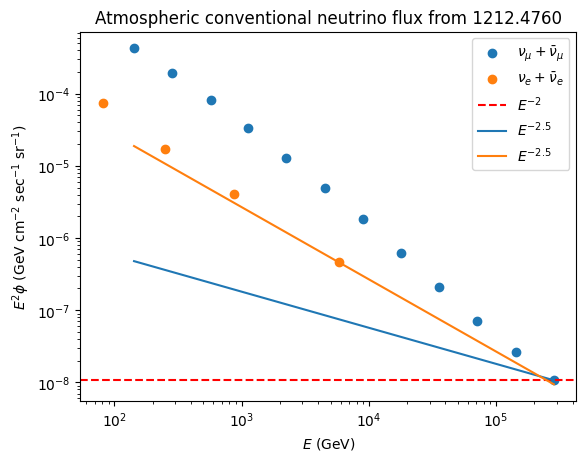

In [21]:
# Recreating figure 2 from Ranjan et al. 

plt.scatter(E_conv_mu_1212, E2phi_mu_1212, label=r"$\nu_\mu + \bar{\nu}_\mu$")
plt.scatter(E_conv_e_1212, E2phi_e_1212, label=r"$\nu_e + \bar{\nu}_e$")
plt.xscale('log')
plt.yscale('log')

pivot_0 = min(E2phi_mu_1212)
plt.axhline(y = pivot_0, linestyle='--', color='r', label=r'$E^{-2}$')

pivot_05 = min(E2phi_mu_1212) 
c_05 = pivot_05 / (E_conv_mu_1212[np.argmin(E2phi_mu_1212)])**(-0.5)
plt.plot(E_conv_mu_1212, (E_conv_mu_1212 )**(-0.5) * c_05, label=r'$E^{-2.5}$')

pivot_10 = min(E2phi_e_1212) 
c_10 = pivot_10 / (E_conv_e_1212[np.argmin(E2phi_e_1212)])**(-1)
plt.plot(E_conv_mu_1212, (E_conv_mu_1212 )**(-1) * c_10, label=r'$E^{-2.5}$')

plt.xlabel(r"$E$ (GeV)")
plt.ylabel(r"$E^2 \phi$ (GeV cm$^{-2}$ sec$^{-1}$ sr$^{-1}$)")
plt.title("Atmospheric conventional neutrino flux from 1212.4760")
plt.legend()
plt.show()

In [47]:
# Importing data for recreating fig 3 from Ranjan et al.

A_eff_e = pd.read_csv("Data/1304.5356 fig 3 A_eff_nu_e.csv", header=None)
A_eff_mu = pd.read_csv("Data/1304.5356 fig 3 A_eff_nu_mu.csv", header=None)

E_casc_e = 10**(np.array(A_eff_e[0]))  # in GeV
A_eff_e_casc = np.array(A_eff_e[1])  # in cm^2

In [65]:
# Convolving A_eff_e_casc with a gaussian function to simulate energy resolution
def gaussian(x, mu, sigma):
    return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)

sigma = 0.15 * E_casc_e  # 15% energy resolution

dE = np.diff(E_casc_e)
dE = np.append(dE, dE[-1])

for i in range(len(E_casc_e)):
    if i == 0:
        A_eff_e_casc_smeared = np.zeros(len(E_casc_e))
    mu = E_casc_e[i]
    g = gaussian(E_casc_e, mu, sigma[i])
    A_eff_e_casc_smeared += A_eff_e_casc[i] * g * dE[i]

$$ \frac{dN}{dE} = 4 \pi \cdot A_{eff} \cdot T \cdot \frac{d \phi}{d E} $$

/tmp/ipykernel_3716/1696274094.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


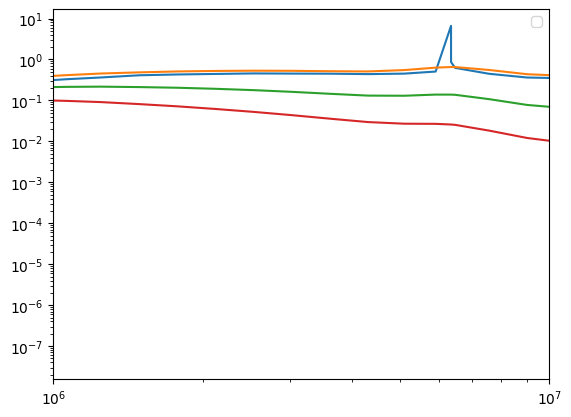

In [72]:
T = 615.9 * 24 * 3600  # exposure time in seconds (615.9 days)

plt.loglog(E_casc_e, E_casc_e * 4 * np.pi * A_eff_e_casc * 10000 * T * pivot_0 * E_casc_e**(-2))
plt.loglog(E_casc_e, E_casc_e * 4 * np.pi * A_eff_e_casc_smeared * 10000 * T * pivot_0 * E_casc_e**(-2))
plt.loglog(E_casc_e, E_casc_e * 4 * np.pi * A_eff_e_casc_smeared * 10000 * T * c_05 * E_casc_e**(-2.5))
plt.loglog(E_casc_e, E_casc_e * 4 * np.pi * A_eff_e_casc_smeared * 10000 * T * c_10 * E_casc_e**(-3))
plt.xlim(1e6, 1e7)
plt.legend()

In [67]:
dE

array([ 3.46403125e+04, -1.98869478e+04,  0.00000000e+00,  0.00000000e+00,
        5.79169574e+04, -1.95493502e+04,  0.00000000e+00,  6.21048958e+04,
       -2.18757048e+04,  0.00000000e+00,  6.94953208e+04, -2.44788934e+04,
        7.77651996e+04, -2.73918590e+04,  8.70191862e+04,  6.67229239e+04,
        8.60309248e+04,  8.49004903e+04,  1.08497056e+05,  1.56870058e+05,
        1.81849498e+05,  2.48073847e+05,  2.88651132e+05,  3.44433744e+05,
        4.10996498e+05,  4.90422683e+05,  5.85198193e+05,  6.98289328e+05,
        7.92082405e+05,  7.98086868e+05,  4.37743489e+05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.19917533e+05,
        1.10521773e+06,  1.46189596e+06,  1.74441131e+06,  2.08152352e+06,
        2.48378357e+06,  2.96378147e+06,  2.01389347e+06,  6.59326982e+06,
        5.19989785e+06,  6.20479218e+06,  7.40388506e+06,  8.83470588e+06,
        1.05420367e+07,  